# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Twitter_Analysis.csv')
df

,Date,Category,Likes,Shares,Reposts,Comments
0,2015-01-01,Fashion,7495,379,186,9386
1,2015-01-01,Health,1434,741,53,9397
2,2015-01-01,Family,6412,686,55,9525
3,2015-01-01,Culture,3894,914,127,9728
4,2015-01-01,Travel,9825,614,29,4575
...,...,...,...,...,...,...
89995,2023-12-30,Food,4435,553,165,8142
89996,2023-12-30,Fitness,9157,846,84,7711
89997,2023-12-30,Music,8197,714,97,5392
89998,2023-12-30,Fashion,6662,119,165,3477


In [4]:
df.describe()

,Likes,Shares,Reposts,Comments
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,4988.509044,500.666144,99.790622,5008.241367
std,2886.904448,288.712012,57.751705,2887.542860
min,0.000000,0.000000,0.000000,0.000000
25%,2467.000000,250.000000,50.000000,2509.000000
50%,4996.000000,502.000000,100.000000,5018.500000
75%,7485.000000,750.000000,150.000000,7509.000000
max,9999.000000,999.000000,199.000000,9999.000000


In [5]:
print("Unique Categories:", df['Category'].unique())

Unique Categories: ['Fashion' 'Health' 'Family' 'Culture' 'Travel' 'Fitness' 'Music' 'Food']


In [6]:
df.head()

,Date,Category,Likes,Shares,Reposts,Comments
0,2015-01-01,Fashion,7495,379,186,9386
1,2015-01-01,Health,1434,741,53,9397
2,2015-01-01,Family,6412,686,55,9525
3,2015-01-01,Culture,3894,914,127,9728
4,2015-01-01,Travel,9825,614,29,4575


In [7]:
df.dtypes

Date        object
Category    object
Likes        int64
Shares       int64
Reposts      int64
Comments     int64
dtype: object

In [8]:
df.corr()

,Likes,Shares,Reposts,Comments
Likes,1.000000,-0.001874,-0.005995,-0.000187
Shares,-0.001874,1.000000,0.000171,-0.006051
Reposts,-0.005995,0.000171,1.000000,-0.003912
Comments,-0.000187,-0.006051,-0.003912,1.000000


In [9]:
numeric_features = df.select_dtypes(include=[np.int64,np.float64])

numeric_features.columns

Index(['Likes', 'Shares', 'Reposts', 'Comments'], dtype='object')

In [10]:
categorical_features = df.select_dtypes(include=[object])

categorical_features.columns

Index(['Date', 'Category'], dtype='object')

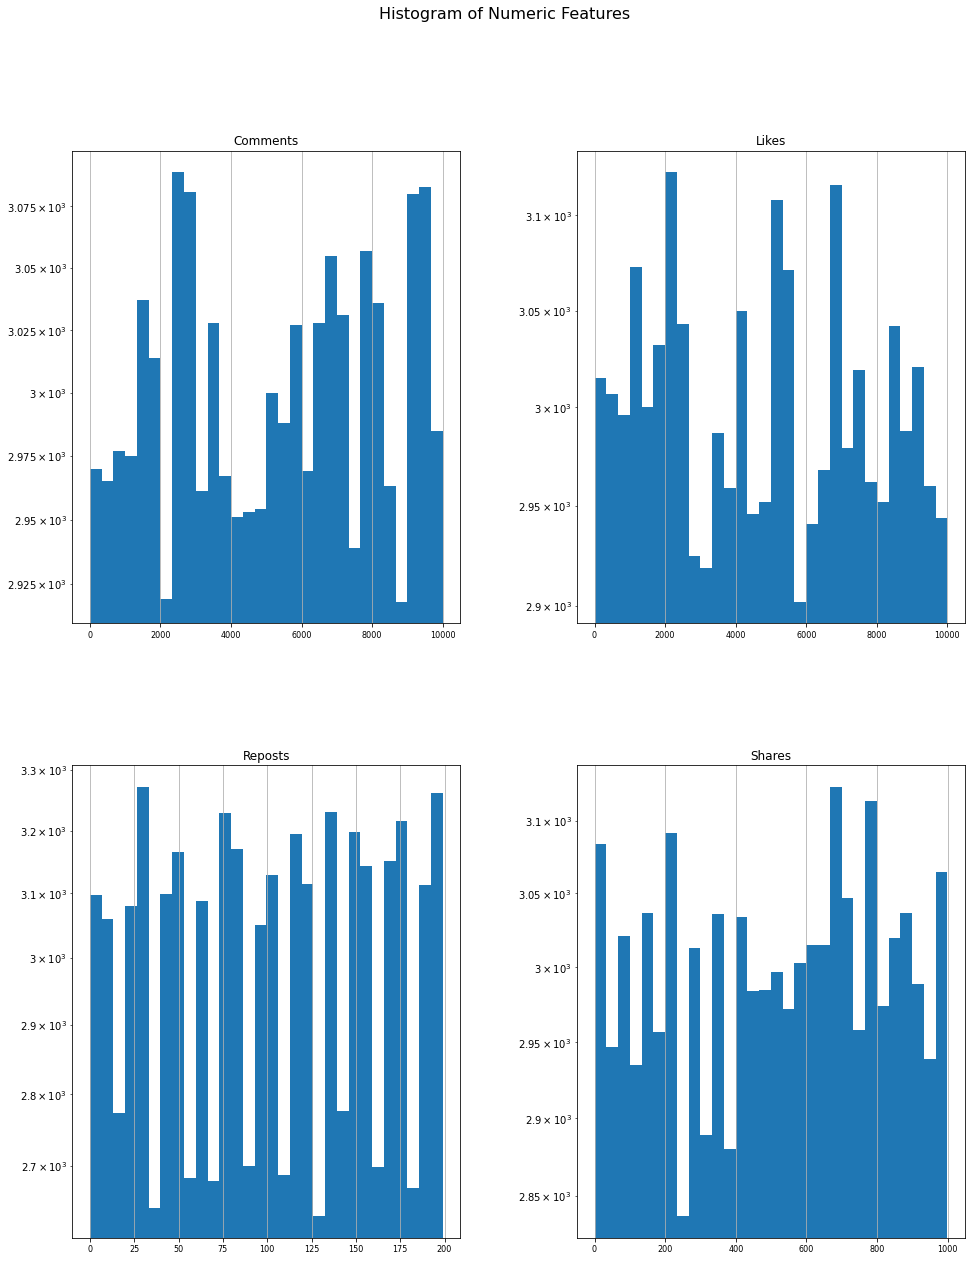

In [11]:
# Plot histograms with adjusted bins and log scale if needed
numeric_features.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8, log=True)  # Adjust bins as needed
plt.suptitle('Histogram of Numeric Features', fontsize=16)
plt.show()


In [12]:
# Calculate skewness for numeric features
skewness = numeric_features.skew()
print(skewness)


Likes       0.003306
Shares     -0.010517
Reposts    -0.004870
Comments   -0.002171
dtype: float64


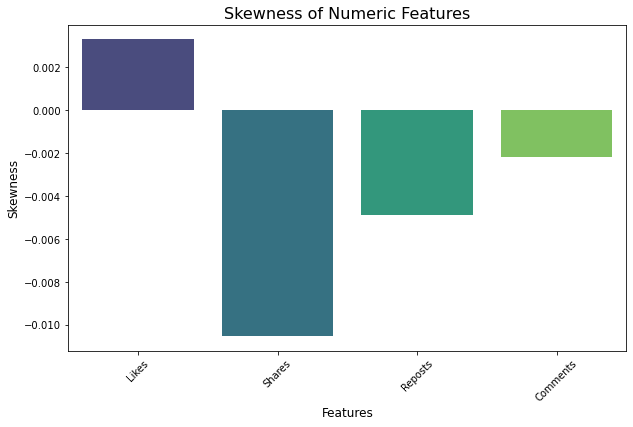

In [13]:
# Plot bar plot of skewness for each numeric feature
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Numeric Features', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Skewness', fontsize=12)
plt.xticks(rotation=45)
plt.show()



In [14]:
df.describe(include=['object'])

,Date,Category
count,90000,90000
unique,3287,8
top,2021-01-24,Food
freq,28,11360


In [15]:
df.describe(include=['int64'])

,Likes,Shares,Reposts,Comments
count,90000.000000,90000.000000,90000.000000,90000.000000
mean,4988.509044,500.666144,99.790622,5008.241367
std,2886.904448,288.712012,57.751705,2887.542860
min,0.000000,0.000000,0.000000,0.000000
25%,2467.000000,250.000000,50.000000,2509.000000
50%,4996.000000,502.000000,100.000000,5018.500000
75%,7485.000000,750.000000,150.000000,7509.000000
max,9999.000000,999.000000,199.000000,9999.000000


Exploratory Data Analysis

In [16]:
print("Dataset Shape: ", df.shape)
print("\nColumns: ", df.columns)
print("\nMissing Data: \n", df.isnull().sum())


Dataset Shape:  (90000, 6)

Columns:  Index(['Date', 'Category', 'Likes', 'Shares', 'Reposts', 'Comments'], dtype='object')

Missing Data: 
 Date        0
Category    0
Likes       0
Shares      0
Reposts     0
Comments    0
dtype: int64


In [17]:
df['Category'].value_counts()

Food       11360
Culture    11329
Music      11287
Fitness    11258
Health     11247
Fashion    11237
Family     11186
Travel     11096
Name: Category, dtype: int64

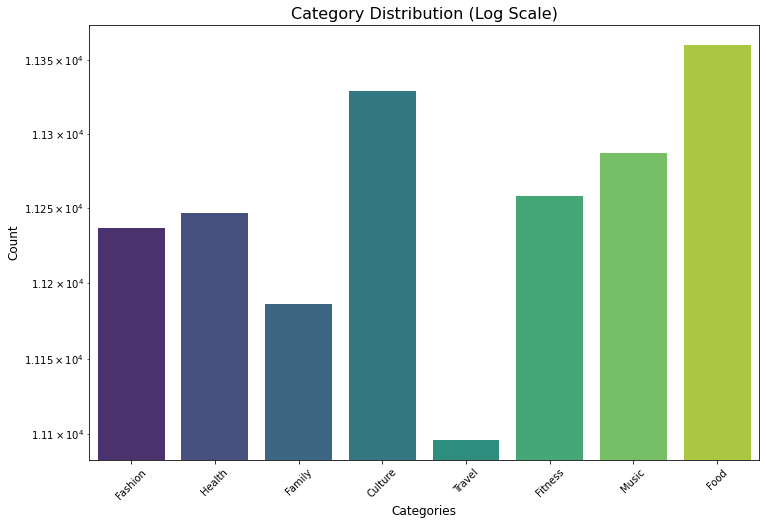

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Category Distribution (Log Scale)', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Apply log scale on y-axis
plt.yscale('log')
plt.show()


In [19]:
df_group = df[['Category','Likes','Reposts']]

In [20]:
df_group = df_group.groupby(['Category'],as_index=False).mean()
df_group

,Category,Likes,Reposts
0,Culture,4981.837055,99.366140
1,Family,4992.789648,99.588235
2,Fashion,5013.476907,99.657560
3,Fitness,4981.561379,99.605525
4,Food,4977.206954,98.776320
5,Health,5018.536410,100.090424
6,Music,4979.910960,101.226012
7,Travel,4962.650865,100.025054


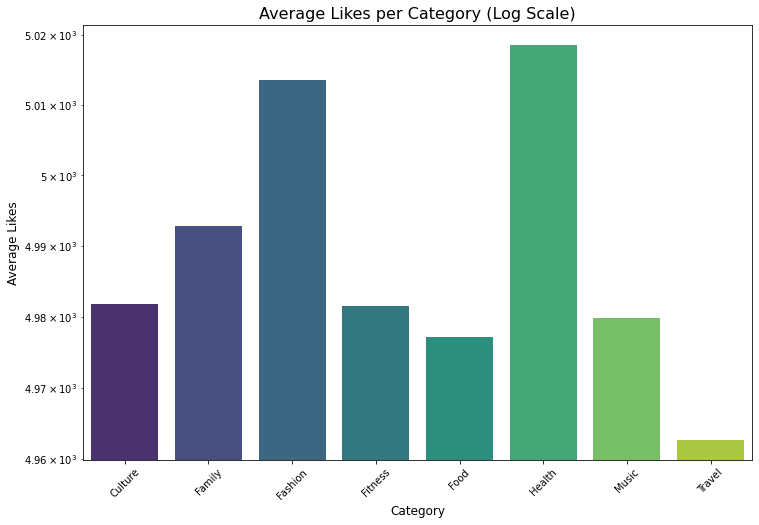

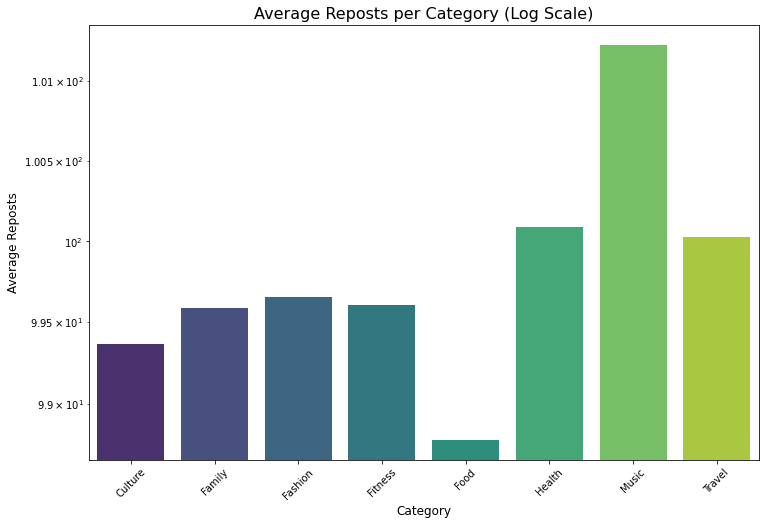

In [21]:
# Plot the average Likes per Category
plt.figure(figsize=(12, 8))
sns.barplot(data=df_group, x='Category', y='Likes', palette='viridis')
plt.title('Average Likes per Category (Log Scale)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Likes', fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

# Plot the average Reposts per Category
plt.figure(figsize=(12, 8))
sns.barplot(data=df_group, x='Category', y='Reposts', palette='viridis')
plt.title('Average Reposts per Category (Log Scale)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Reposts', fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()


Pearson Correlation helps in defining Linear Correlation between two variables.

In [22]:
from scipy import stats

# Columns for correlation analysis
cols = ['Likes', 'Shares', 'Reposts', 'Comments']

# Calculate Pearson Correlation Coefficient and P-value
for col in cols:
    pearson_coef, p_value = stats.pearsonr(df[col], df['Likes'])
    
    # Print the Pearson correlation and p-value
    print(f"The PearsonR between {col} and Likes is {round(pearson_coef, 4)} with a P-value of P = {round(p_value, 4)}")
    
    # Statistical significance based on p-value
    if p_value < 0.001:
        print(f'Correlation between {col} and Likes is statistically significant..')
    elif p_value < 0.05:
        print(f'Correlation between {col} and Likes is statistically moderate..')
    elif p_value < 0.1:
        print(f'Correlation between {col} and Likes is statistically weak..')
    else:
        print(f'Correlation between {col} and Likes is statistically not significant..')

    # Evaluate the strength and direction of the correlation
    if pearson_coef > 0:
        if pearson_coef > 0.85:
            print(f'Coeff ~{round(pearson_coef, 4)} shows that the relationship is positive and very strong.\n')
        elif pearson_coef > 0.75:
            print(f'Coeff ~{round(pearson_coef, 4)} shows that the relationship is positive and quite strong.\n')
        elif pearson_coef > 0.60:
            print(f'Coeff ~{round(pearson_coef, 4)} shows that the relationship is positive and moderately strong.\n')
        elif pearson_coef > 0.50:
            print(f'Coeff ~{round(pearson_coef, 4)} shows that the relationship is positive and only moderate.\n')
        else:
            print(f'Coefficient ~{round(pearson_coef, 4)} shows that the relationship is positive and weak.\n')
    else:
        if abs(pearson_coef) > 0.85:
            print(f'Coeff ~{round(pearson_coef, 4)} shows that the relationship is negative and very strong.\n')
        elif abs(pearson_coef) > 0.75:
            print(f'Coeff ~{round(pearson_coef, 4)} shows that the relationship is negative and quite strong.\n')
        elif abs(pearson_coef) > 0.60:
            print(f'Coeff ~{round(pearson_coef, 4)} shows that the relationship is negative and moderately strong.\n')
        elif abs(pearson_coef) > 0.50:
            print(f'Coeff ~{round(pearson_coef, 4)} shows that the relationship is negative and only moderate.\n')
        else:
            print(f'Coefficient ~{round(pearson_coef, 4)} shows that the relationship is negative and weak.\n')


The PearsonR between Likes and Likes is 1.0 with a P-value of P = 0.0
Correlation between Likes and Likes is statistically significant..
Coeff ~1.0 shows that the relationship is positive and very strong.

The PearsonR between Shares and Likes is -0.0019 with a P-value of P = 0.574
Correlation between Shares and Likes is statistically not significant..
Coefficient ~-0.0019 shows that the relationship is negative and weak.

The PearsonR between Reposts and Likes is -0.006 with a P-value of P = 0.0721
Correlation between Reposts and Likes is statistically weak..
Coefficient ~-0.006 shows that the relationship is negative and weak.

The PearsonR between Comments and Likes is -0.0002 with a P-value of P = 0.9552
Correlation between Comments and Likes is statistically not significant..
Coefficient ~-0.0002 shows that the relationship is negative and weak.



A heatmap shows the variation of a continuous value across two dimensions.

Top correlated features:
 Index(['Likes', 'Comments', 'Shares', 'Reposts'], dtype='object')


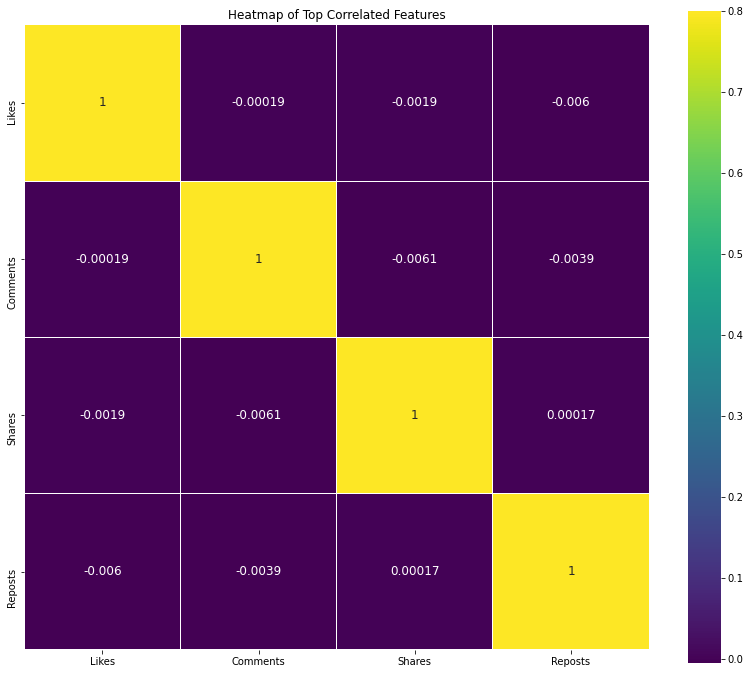

In [23]:
# Number of top correlated features to consider
k = 11  

# Compute correlation matrix
correlation = numeric_features.corr()

# Select the top 'k' features most correlated with 'Likes'
cols = correlation.nlargest(k, 'Likes')['Likes'].index
print("Top correlated features:\n", cols)

# Compute correlation coefficients for selected features
cm = np.corrcoef(df[cols].values.T)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, cmap='viridis', vmax=.8, linewidths=0.01, 
            square=True, linecolor="white", xticklabels=cols, 
            yticklabels=cols, annot_kws={'size': 12})
plt.title("Heatmap of Top Correlated Features")
plt.show()
